In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import glob
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


In [2]:
IMG_WIDTH = 300
IMG_HEIGHT = 300
IMG_DIM = (IMG_WIDTH, IMG_HEIGHT)


In [3]:
all_frames = glob.glob('D:\deepfake_detection\datasets\\real-frames/*') + \
    glob.glob('D:\deepfake_detection\datasets\\fake-frames/*')
len(all_frames)


39600

In [5]:
# Create the pandas DataFrame
df = pd.DataFrame([all_frames])
df = df.T
df.columns = ['path']
df['filename'] = df['path'].apply(lambda x: x.split('\\')[-1])
df['folder'] = df['filename'].apply(lambda x: x.split('_')[0])
dfr = df.groupby('folder').head(50)
# df.groupby(by=["folder"]).size()
dfr


,path,filename,folder
0,D:\deepfake_detection\datasets\real-frames\aff...,affyecftqy_10.png,affyecftqy
1,D:\deepfake_detection\datasets\real-frames\aff...,affyecftqy_100.png,affyecftqy
2,D:\deepfake_detection\datasets\real-frames\aff...,affyecftqy_101.png,affyecftqy
3,D:\deepfake_detection\datasets\real-frames\aff...,affyecftqy_102.png,affyecftqy
4,D:\deepfake_detection\datasets\real-frames\aff...,affyecftqy_103.png,affyecftqy
...,...,...,...
39495,D:\deepfake_detection\datasets\fake-frames\zyn...,zynjpflhsl_166.png,zynjpflhsl
39496,D:\deepfake_detection\datasets\fake-frames\zyn...,zynjpflhsl_167.png,zynjpflhsl
39497,D:\deepfake_detection\datasets\fake-frames\zyn...,zynjpflhsl_17.png,zynjpflhsl
39498,D:\deepfake_detection\datasets\fake-frames\zyn...,zynjpflhsl_170.png,zynjpflhsl


In [6]:
labels = pd.read_csv('D:\deepfake_detection\dfdc-labels1.csv')
labels.dropna(inplace=True)
labels.drop(['path'], axis=1, inplace=True)
labels


,filename,label
0,yepaqgceod_176.png,FAKE
1,yepaqgceod_88.png,FAKE
2,yepaqgceod_162.png,FAKE
3,yepaqgceod_189.png,FAKE
4,yepaqgceod_77.png,FAKE
...,...,...
39595,jhctyebusd_137.png,REAL
39596,jhctyebusd_22.png,REAL
39597,jhctyebusd_36.png,REAL
39598,jhctyebusd_269.png,REAL


In [7]:
labelencoder = LabelEncoder()
train_df = labels.merge(dfr, on='filename', how='right')
train_df['label'] = labelencoder.fit_transform(train_df['label'])
train_df

,filename,label,path,folder
0,affyecftqy_10.png,1,D:\deepfake_detection\datasets\real-frames\aff...,affyecftqy
1,affyecftqy_100.png,1,D:\deepfake_detection\datasets\real-frames\aff...,affyecftqy
2,affyecftqy_101.png,1,D:\deepfake_detection\datasets\real-frames\aff...,affyecftqy
3,affyecftqy_102.png,1,D:\deepfake_detection\datasets\real-frames\aff...,affyecftqy
4,affyecftqy_103.png,1,D:\deepfake_detection\datasets\real-frames\aff...,affyecftqy
...,...,...,...,...
13195,zynjpflhsl_166.png,0,D:\deepfake_detection\datasets\fake-frames\zyn...,zynjpflhsl
13196,zynjpflhsl_167.png,0,D:\deepfake_detection\datasets\fake-frames\zyn...,zynjpflhsl
13197,zynjpflhsl_17.png,0,D:\deepfake_detection\datasets\fake-frames\zyn...,zynjpflhsl
13198,zynjpflhsl_170.png,0,D:\deepfake_detection\datasets\fake-frames\zyn...,zynjpflhsl


In [8]:
# SPLIT
df_train = train_df.sample(frac=0.80)
df_validation = train_df.drop(df_train.index)
print(len(df_train), len(df_validation))
df_train


10560 2640


,filename,label,path,folder
3688,ngeaavegic_170.png,1,D:\deepfake_detection\datasets\real-frames\nge...,ngeaavegic
3143,lhjclmpeyg_166.png,1,D:\deepfake_detection\datasets\real-frames\lhj...,lhjclmpeyg
6207,xtzbukvobk_106.png,1,D:\deepfake_detection\datasets\real-frames\xtz...,xtzbukvobk
6508,zpwhxtbdfi_107.png,1,D:\deepfake_detection\datasets\real-frames\zpw...,zpwhxtbdfi
2619,jzaqsfyati_117.png,1,D:\deepfake_detection\datasets\real-frames\jza...,jzaqsfyati
...,...,...,...,...
6946,bdyrlwexay_167.png,0,D:\deepfake_detection\datasets\fake-frames\bdy...,bdyrlwexay
2819,kmqprpvlob_117.png,1,D:\deepfake_detection\datasets\real-frames\kmq...,kmqprpvlob
10435,ouruynaloe_15.png,0,D:\deepfake_detection\datasets\fake-frames\our...,ouruynaloe
5937,wrzuojwklk_159.png,1,D:\deepfake_detection\datasets\real-frames\wrz...,wrzuojwklk


In [9]:
train_vector = []
c = 0
for row in df_train.itertuples():
    train_vector.append(img_to_array(load_img(row.path, target_size=IMG_DIM)))
    if c % 100 == 0:
        print(c)
    c += 1


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500


In [10]:
val_vector = []
c = 0
for row in df_validation.itertuples():
    val_vector.append(img_to_array(load_img(row.path, target_size=IMG_DIM)))
    if c % 100 == 0:
        print(c)
    c += 1

# train_vector = np.array([[img_to_array(load_img(img, target_size=IMG_DIM)) for img in df_train.path]])
# val_vector = np.array([[img_to_array(load_img(img, target_size=IMG_DIM)) for img in df_validation.path]])


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600


In [11]:
len(train_vector), len(val_vector)


(10560, 2640)

In [13]:
val_vector_arr = np.array(val_vector)


In [15]:
train_vector_arr = np.array(train_vector)


In [16]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    train_vector_arr, df_train['label'], batch_size=30)
val_generator = val_datagen.flow(
    val_vector_arr, df_validation['label'], batch_size=30)


## Models


### Resnext


In [ ]:
from keras.models import Model
ResNeXt50, preprocess_input = Classifiers.get('resnext50')
resnext = ResNeXt50(include_top=False, input_shape=(
    IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
output = resnext.layers[-1].output
output = keras.layers.Flatten()(output)

resnext = Model(inputs=resnext.input, outputs=output)
for layer in resnext.layers:
    layer.trainable = False


### Resnet


In [ ]:
import keras
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

resnet = ResNet50(include_top=False, weights='imagenet',
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

output = resnet.layers[-1].output
output = keras.layers.Flatten()(output)

resnet = Model(inputs=resnet.input, outputs=output)
for layer in resnet.layers:
    layer.trainable = False
# resnet.summary()


### DenseNet-121


In [17]:
import keras
from keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121

denseNet121 = DenseNet121(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))

for layer in denseNet121.layers:
    layer.trainable = False

denseNet121 = Model(inputs=denseNet121.input, outputs=keras.layers.Flatten()(denseNet121.layers[-1].output))

### VGG-19


In [ ]:
import keras
from keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19

vgg19 = VGG19(include_top=False, weights='imagenet',
              input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

for layer in vgg19.layers:
    layer.trainable = False

vgg19 = Model(inputs=vgg19.input, outputs=keras.layers.Flatten()
              (vgg19.layers[-1].output))
# model.summary()


### VGG-16


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Loading VGG16 model
vgg16 = VGG16(weights="imagenet", include_top=False,
              input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
vgg16.trainable = False  # Not trainable weights

vgg16 = Model(inputs=vgg16.input, outputs=keras.layers.Flatten()
              (vgg16.layers[-1].output))


### Inception


In [ ]:
from tensorflow.keras.applications import InceptionV3

# Loading VGG16 model
inceptionv3 = InceptionV3(
    weights="imagenet", include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
inceptionv3.trainable = False  # Not trainable weights

inceptionv3 = Model(inputs=inceptionv3.input, outputs=keras.layers.Flatten()(
    inceptionv3.layers[-1].output))


## Compile Model


In [18]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()
# model.add(resnet)
# model.add(vgg16)
# model.add(vgg19)
model.add(denseNet121)
# model.add(resnext)
# model.add(inceptionv3)

model.add(Dense(512, activation='relu', input_dim=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 82944)             7037504   
_________________________________________________________________
dense (Dense)                (None, 512)               42467840  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 49,768,513
Trainable params: 42,731,009
Non-trainable params: 7,037,504
____________________________________

In [19]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
# batchsize30 stepsperepoch20

history = model.fit(train_generator,
                    epochs=7,
                    validation_data=val_generator,
                    verbose=1,
                    callbacks=[earlystopping])


Epoch 1/7
352/352 [==============================] - 1231s 3s/step - loss: 0.6645 - accuracy: 0.6241 - val_loss: 0.4915 - val_accuracy: 0.7830
Epoch 2/7
352/352 [==============================] - 1269s 4s/step - loss: 0.5732 - accuracy: 0.7057 - val_loss: 0.4575 - val_accuracy: 0.7898
Epoch 3/7
352/352 [==============================] - 1233s 4s/step - loss: 0.5254 - accuracy: 0.7395 - val_loss: 0.4230 - val_accuracy: 0.8072
Epoch 4/7
352/352 [==============================] - 1191s 3s/step - loss: 0.4843 - accuracy: 0.7640 - val_loss: 0.3918 - val_accuracy: 0.8277
Epoch 5/7
352/352 [==============================] - 1144s 3s/step - loss: 0.4604 - accuracy: 0.7798 - val_loss: 0.3634 - val_accuracy: 0.8583
Epoch 6/7
352/352 [==============================] - 1190s 3s/step - loss: 0.4413 - accuracy: 0.7966 - val_loss: 0.3990 - val_accuracy: 0.8470
Epoch 7/7
352/352 [==============================] - 1224s 3s/step - loss: 0.4133 - accuracy: 0.8119 - val_loss: 0.3521 - val_accuracy: 0.8655

In [20]:
model.save('D:\deepfake_detection\datasets\\new_densenet-121\\new_densenet-121-acc-81.h5', save_format='h5')


## Graphs


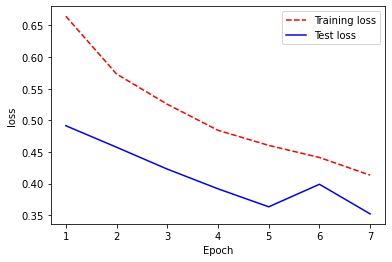

In [24]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training loss', 'Test loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()
